In [ ]:
import numpy as np 
import random
import scipy

class TrafficSimulation():

    def __init__(self, length=100,density=0.2, slow_down_prob=0.5, max_speed=5):
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            length (int) The number of cells in the road. Default: 100.

            car_density (float) The fraction of cells that have a car on them.
              Default: 0.2.

            slow_down_prob (float) The probability that a car will randomly
              slow down by 1 during an update step. Default: 0.5.

            max_speed (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
        self.length = length
        self.density = density
        self.max_speed = max_speed
        self.slow_down_prob = slow_down_prob
        self.state = -np.ones(self.length, dtype=int)  # -1 represents empty cell

        random_indexes = np.random.choice(
            range(self.length),
            size=int(round(density * self.length)),
            replace=False)
        self.state[random_indexes] = np.random.randint(
            0, self.max_speed + 1, size=len(random_indexes))
        # Adding new parameters to measure traffic flow
        self.time_step = 0 
        self.total_traffic_flow = 0 

    def update(self, display=False):
        '''
        Advance one time step in the simulation.

        Inputs:

            display (bool) Whether to display the state of the simulation. Default: True.
        '''
        # Update car velocities.
        for i in range(self.length):
            if self.state[i] != -1:
                distance = 1  # The number of empty cells between this car and the next plus 1
                while self.state[(i + distance) % self.length] == -1:
                    distance += 1
                # Acceleration
                if self.state[i] < self.max_speed:
                    self.state[i] += 1
                # Deceleration
                if self.state[i] >= distance:
                    self.state[i] = distance - 1
                # Randomization
                if (self.state[i] > 0) and (np.random.uniform() < self.slow_down_prob):
                    self.state[i] -= 1
        if display:
            self.display()

        # Move cars forward using their new velocities
        new_state = -np.ones(self.length, dtype=int)
        for i in range(self.length):
            if self.state[i] != -1:
                new_state[(i + self.state[i]) % self.length] = self.state[i]
        self.state = new_state
# For every time step, we add the traffic flow measured in that time step to total_traffic_flow
        self.time_step += 1
        for i in range(self.max_speed):
            if self.state[i] > i:
                self.total_traffic_flow += 1
    def display(self):
        '''
        Print out the current state of the simulation.
        '''
        print(''.join('.' if x == -1 else str(x) for x in self.state))

In [8]:
cars_density_list = []
traffic_flow_list = []
for density in range(1, 101):
    sim = TrafficSimulation(density = density/100)
    print('Traffic density:', sim.density)
    density_list.append(sim.density)
    
    trial_flow = []
    for trial in range(50): 
        for i in range(100):
            sim.update()
        trial_flow.append(sim.total_traffic_flow / sim.time_step)
    traffic_flow_list.append(sum(trial_flow)/len(trial_flow))
    print('Average traffic flow:', sum(trial_flow)/len(trial_flow))
#Replicating Figure 4
import matplotlib.pyplot as plt
plt.plot(cars_density_list, traffic_flow_list)
plt.xlabel("Density (cars per site)")
plt.ylabel("Flow rate (cars per time step)")
plt.title("Simulation of density vs flow rate")
plt.show()

Traffic density: 0.01
Average traffic flow: 0.04500000000000001
Traffic density: 0.02
Average traffic flow: 0.08935056508571407
Traffic density: 0.03
Average traffic flow: 0.1343088124197354
Traffic density: 0.04
Average traffic flow: 0.18000000000000005
Traffic density: 0.05
Average traffic flow: 0.22511013644293443
Traffic density: 0.06
Average traffic flow: 0.266485056056989
Traffic density: 0.07
Average traffic flow: 0.31262759979206384
Traffic density: 0.08
Average traffic flow: 0.3548900984539626
Traffic density: 0.09
Average traffic flow: 0.3925135024826395
Traffic density: 0.1
Average traffic flow: 0.4163788304478029
Traffic density: 0.11
Average traffic flow: 0.3652427715935166
Traffic density: 0.12
Average traffic flow: 0.30515236456332623
Traffic density: 0.13
Average traffic flow: 0.3211900016521147
Traffic density: 0.14
Average traffic flow: 0.3145113849826215
Traffic density: 0.15
Average traffic flow: 0.30980672195451603
Traffic density: 0.16
Average traffic flow: 0.3134

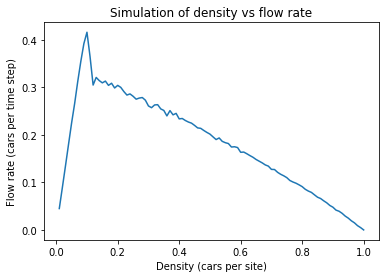

In [9]:
import matplotlib.pyplot as plt

plt.plot(density_list, traffic_flow_list)
plt.xlabel("Density (cars per site)")
plt.ylabel("Flow rate (cars per time step)")
plt.title("Simulation of density vs flow rate")
plt.show()